<a href="https://colab.research.google.com/github/Colsai/Small-Assignments/blob/main/Sumo_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Study of Sumo Wrestling and Sumo Winners                 

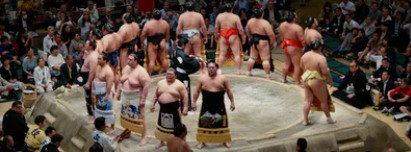

**Note: Thanks to original author of dataset for compiling the data-  
Data Source: https://data.world/cervus/sumo-banzuke by https://data.world/cervus**

## Background: This look at sumo wrestling analyzes tournaments from 1983-2019
Sumo Wrestling is not a sport that has had a great deal of study on it. However, there is decent data on the sport- the win types, rankings, multiple days and dates for each 14 day tournament, which is held on each season in Japan. In this exploratory notebook, we will look for patterns in Sumo Wrestling that may be studied in later analysis.

Specifically, 
This notebook takes a look at which methods of victory are most successful, which wrestlers have been most successful, etc.

## Import the packages we will be using for this

In [305]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import os
import matplotlib.pyplot as plt

## Add the Files First
Let's look into the contents of the drive, and found the data source.

In [306]:
os.getcwd()

'/content'

In [307]:
os.listdir('/content/drive/My Drive/cervus-sumo-results')

['datapackage.json', 'data', 'original']

In [308]:
sumo_data = "/content/drive/My Drive/cervus-sumo-results/data/"

In [309]:
# Get rid of pointless stuff here
dir = os.listdir(sumo_data)

csv_files = []

for file in dir:
    if ".csv" in file:
        csv_files.append(file)

    else:
        csv_files

We have files from 1983-2019, unorganized. Let's take and merge them into one file.

In [310]:
csv_files

['1988.csv',
 '1984.csv',
 '1985.csv',
 '1989.csv',
 '1986.csv',
 '1987.csv',
 '1983.csv',
 '2005.csv',
 '2002.csv',
 '2003.csv',
 '2013.csv',
 '2011.csv',
 '2001.csv',
 '2015.csv',
 '2004.csv',
 '2018.csv',
 '1991.csv',
 '2008.csv',
 '2017.csv',
 '2006.csv',
 '2016.csv',
 '1995.csv',
 '1994.csv',
 '2000.csv',
 '2007.csv',
 '1997.csv',
 '2019.csv',
 '2012.csv',
 '2009.csv',
 '2010.csv',
 '1993.csv',
 '1990.csv',
 '1992.csv',
 '1998.csv',
 '1999.csv',
 '2014.csv',
 '1996.csv']

In [311]:
#Merges all of the csv files after finding them
full_df = []

for file in csv_files:
    df = pd.read_csv(sumo_data + file)
    full_df.append(df)

In [312]:
#Looks good here. Just ahve to convert it into df.
full_df[0:5]

[        basho  day  rikishi1_id  ... rikishi2_shikona rikishi2_result rikishi2_win
 0     1988.01    1           51  ...       Saganobori       1-0 (8-7)         True
 1     1988.01    1         1331  ...           Daizen       0-1 (6-1)        False
 2     1988.01    1         1433  ...         Seionada      0-1 (0-15)        False
 3     1988.01    1         1496  ...       Kitafubuki      1-0 (5-10)         True
 4     1988.01    1         1377  ...       Tochimatoi       1-0 (8-7)         True
 ...       ...  ...          ...  ...              ...             ...          ...
 5629  1988.11   15         1379  ...        Asahifuji            12-3         True
 5630  1988.11   15         1287  ...        Hokutenyu            10-5         True
 5631  1988.11   15         1363  ...        Konishiki            10-5        False
 5632  1988.11   15         1350  ...      Chiyonofuji            14-1        False
 5633  1988.11   15         1354  ...          Onokuni            11-4      

In [313]:
#This step takes a while (naturally)
full_df = pd.concat(full_df)

## Let's play with the dataframe here...
first, shape and describe our data

In [314]:
full_df.shape

(214788, 13)

In [315]:
#Describing Countable Statistics:
full_df.describe()

,basho,day,rikishi1_id,rikishi2_id
count,214788.000000,214788.000000,214788.000000,214788.000000
mean,2001.251881,7.979747,2510.026766,2510.026766
std,10.638120,4.331455,3498.619846,3498.619846
min,1983.010000,1.000000,1.000000,1.000000
25%,1992.070000,4.000000,59.000000,59.000000
50%,2001.110000,8.000000,1241.000000,1241.000000
75%,2010.110000,12.000000,4099.000000,4099.000000
max,2019.090000,16.000000,12470.000000,12470.000000


#Looking at the First 10 and Last 10 Entries Here
*   Lots of stuff not in describe
*   Show First/ Last/ Sample 10



In [316]:
full_df.head(10)

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,1988.01,1,51,Ms1e,Daizen,0-1 (6-1),False,yorikiri,1331,J13w,Saganobori,1-0 (8-7),True
1,1988.01,1,1331,J13w,Saganobori,1-0 (8-7),True,yorikiri,51,Ms1e,Daizen,0-1 (6-1),False
2,1988.01,1,1433,J12w,Kitafubuki,1-0 (5-10),True,yorikiri,1496,J13e,Seionada,0-1 (0-15),False
3,1988.01,1,1496,J13e,Seionada,0-1 (0-15),False,yorikiri,1433,J12w,Kitafubuki,1-0 (5-10),True
4,1988.01,1,1377,J12e,Iwatefuji,0-1 (4-11),False,tsukidashi,4138,J11w,Tochimatoi,1-0 (8-7),True
5,1988.01,1,4138,J11w,Tochimatoi,1-0 (8-7),True,tsukidashi,1377,J12e,Iwatefuji,0-1 (4-11),False
6,1988.01,1,1296,J11e,Kasugafuji,0-1 (8-7),False,tsukiotoshi,4140,J10w,Chikubayama,1-0 (7-8),True
7,1988.01,1,4140,J10w,Chikubayama,1-0 (7-8),True,tsukiotoshi,1296,J11e,Kasugafuji,0-1 (8-7),False
8,1988.01,1,1365,J10e,Hananofuji,0-1 (7-8),False,shitatenage,4094,J9w,Onishiki,1-0 (5-10),True
9,1988.01,1,4094,J9w,Onishiki,1-0 (5-10),True,shitatenage,1365,J10e,Hananofuji,0-1 (7-8),False


In [317]:
full_df.tail(10)

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
5852,1996.11,15,1,Y1w,Akebono,11-4,True,tsukitaoshi,3,O1e,Wakanohana,11-4,False
5853,1996.11,15,3,O1e,Wakanohana,11-4,False,tsukitaoshi,1,Y1w,Akebono,11-4,True
5854,1996.11,16,3,O1e,Wakanohana,(11-4),False,yoritaoshi,4,O1w,Musashimaru,(11-4),True
5855,1996.11,16,4,O1w,Musashimaru,(11-4),True,yoritaoshi,3,O1e,Wakanohana,(11-4),False
5856,1996.11,16,5,O2e,Takanonami,(11-4),True,sukuinage,7,S1w,Kaio,(11-4),False
5857,1996.11,16,7,S1w,Kaio,(11-4),False,sukuinage,5,O2e,Takanonami,(11-4),True
5858,1996.11,16,1,Y1w,Akebono,(11-4),False,yorikiri,4,O1w,Musashimaru,(11-4),True
5859,1996.11,16,4,O1w,Musashimaru,(11-4),True,yorikiri,1,Y1w,Akebono,(11-4),False
5860,1996.11,16,4,O1w,Musashimaru,(11-4),True,yorikiri,5,O2e,Takanonami,(11-4),False
5861,1996.11,16,5,O2e,Takanonami,(11-4),False,yorikiri,4,O1w,Musashimaru,(11-4),True


In [318]:
full_df.sample(10)

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
2572,1994.05,10,44,J2e,Kushimaumi,6-4 (8-7),True,kotenage,1294,M15w,Naminohana,4-6 (6-9),False
3364,2006.07,4,72,J2e,Tochisakae,2-2 (6-9),False,tsukiotoshi,1243,J1w,Katayama,2-2 (6-9),True
2423,2008.05,5,1187,M1e,Kokkai,0-5 (3-12),False,uwatenage,7,O1w,Kaio,2-3 (8-7),True
3066,1995.07,2,3,O1w,Wakanohana,2-0 (11-4),True,oshidashi,45,M7e,Daishoho,0-2 (6-9),False
5117,2002.11,11,149,Ms2e,Juzan,4-2 (5-2),False,yoritaoshi,68,J12w,Gokenzan,6-5 (7-8),True
5027,1997.11,5,21,M2e,Asahiyutaka,1-4 (6-9),True,uwatenage,2,Y1e,Takanohana,4-1 (14-1),False
1963,2004.03,15,225,J9e,Takanotsuru,9-6,True,sokubiotoshi,222,J10w,Sumanofuji,8-7,False
5247,2003.11,11,1009,M4w,Asasekiryu,3-8 (3-12),True,oshidashi,5,M5e,Takanonami,4-7 (5-10),False
290,2006.01,5,40,J7w,Kaiho,3-2 (7-8),False,yorikiri,1018,J9e,Shimotori,2-3 (7-8),True
2680,2000.05,14,9,M7w,Akinoshima,9-5 (10-5),False,shitatenage,842,S1e,Miyabiyama,10-4 (11-4),True


# Some Variable Definitions
Here are some sumo definitions here...

| Term | Defintion |
| - | - | 
| Basho | The Year and Date | 
| Day | What day of the tournament? There are 14 days |
| Rikishi id |  code of each wrestler, probably not unique? |
| Rikishi Rank |  The rank of the rikishi, coded |
| Shikona | Name of Wrestler |
| Rikishi1 | The result of the match |
| Kimarite | The Win Type |

# So what are the rikishi rank codes? 
Let's go search for them...

Rikishi Ranks (in order)

- makuuchi (幕内). Maximum 42 wrestlers; Further divided into five ranks
- jūryō (十両). Fixed at 28 wrestlers
- makushita (幕下). Fixed at 120 wrestlers
- sandanme (三段目). Fixed at 200 wrestlers
- jonidan (序二段). About 200 wrestlers
- jonokuchi (序ノ口 or 序の口). Around 50 wrestlers

These didn't really seem to go well. How about...
http://www.sumotalk.com/structure.htm


In [319]:
#Let's recode the rikishi ranks as back to original names

#Catch-all in case one doesn't detect
unknown = []

sumo_rank_all = []
sumo_num_rank = []

for wrestler in full_df['rikishi1_rank']:
    if "Y" in wrestler: 
        sumo_rank_all.append("Yokozuna")
        sumo_num_rank.append(1)

    elif "O" in wrestler:
        sumo_rank_all.append("Ozeki")
        sumo_num_rank.append(2)

    elif "S" in wrestler:
        sumo_rank_all.append("Sekiwake")
        sumo_num_rank.append(3)

    elif "K" in wrestler:
        sumo_rank_all.append("Komosubi")
        sumo_num_rank.append(4)

    elif "Ms" in wrestler:
        sumo_rank_all.append("Maegashira")
        sumo_num_rank.append(5)

    elif "J" in wrestler:
        sumo_rank_all.append("Juryo")
        sumo_num_rank.append(6)

    else:
        sumo_rank_all.append("Unknown")
        sumo_num_rank.append(0)

In [320]:
full_df.insert(5, "sumo_rank", sumo_rank_all)
full_df.insert(6, "sumo_num_rank", sumo_num_rank)

In [341]:
full_df.head(15)

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,sumo_rank,sumo_num_rank,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,1988.01,1,51,Ms1e,Daizen,Maegashira,5,0-1 (6-1),False,yorikiri,1331,J13w,Saganobori,1-0 (8-7),True
1,1988.01,1,1331,J13w,Saganobori,Juryo,6,1-0 (8-7),True,yorikiri,51,Ms1e,Daizen,0-1 (6-1),False
2,1988.01,1,1433,J12w,Kitafubuki,Juryo,6,1-0 (5-10),True,yorikiri,1496,J13e,Seionada,0-1 (0-15),False
3,1988.01,1,1496,J13e,Seionada,Juryo,6,0-1 (0-15),False,yorikiri,1433,J12w,Kitafubuki,1-0 (5-10),True
4,1988.01,1,1377,J12e,Iwatefuji,Juryo,6,0-1 (4-11),False,tsukidashi,4138,J11w,Tochimatoi,1-0 (8-7),True
5,1988.01,1,4138,J11w,Tochimatoi,Juryo,6,1-0 (8-7),True,tsukidashi,1377,J12e,Iwatefuji,0-1 (4-11),False
6,1988.01,1,1296,J11e,Kasugafuji,Juryo,6,0-1 (8-7),False,tsukiotoshi,4140,J10w,Chikubayama,1-0 (7-8),True
7,1988.01,1,4140,J10w,Chikubayama,Juryo,6,1-0 (7-8),True,tsukiotoshi,1296,J11e,Kasugafuji,0-1 (8-7),False
8,1988.01,1,1365,J10e,Hananofuji,Juryo,6,0-1 (7-8),False,shitatenage,4094,J9w,Onishiki,1-0 (5-10),True
9,1988.01,1,4094,J9w,Onishiki,Juryo,6,1-0 (5-10),True,shitatenage,1365,J10e,Hananofuji,0-1 (7-8),False


In [322]:
#And break it into east and west

## Most Common and Least Common Win-Types
Let's look at the most and least common ways to win

In [383]:
#How many different kinds of wins have there been in all of the matches?
len(full_df['kimarite'].value_counts())

84

In [385]:
#Let's look more at win types...
win_types = full_df['kimarite'].value_counts()

In [324]:
win_types.head(10)

yorikiri       62712
oshidashi      41036
hatakikomi     16584
uwatenage      12572
tsukiotoshi    11440
hikiotoshi      9794
yoritaoshi      8466
okuridashi      6700
oshitaoshi      5532
sukuinage       5386
Name: kimarite, dtype: int64

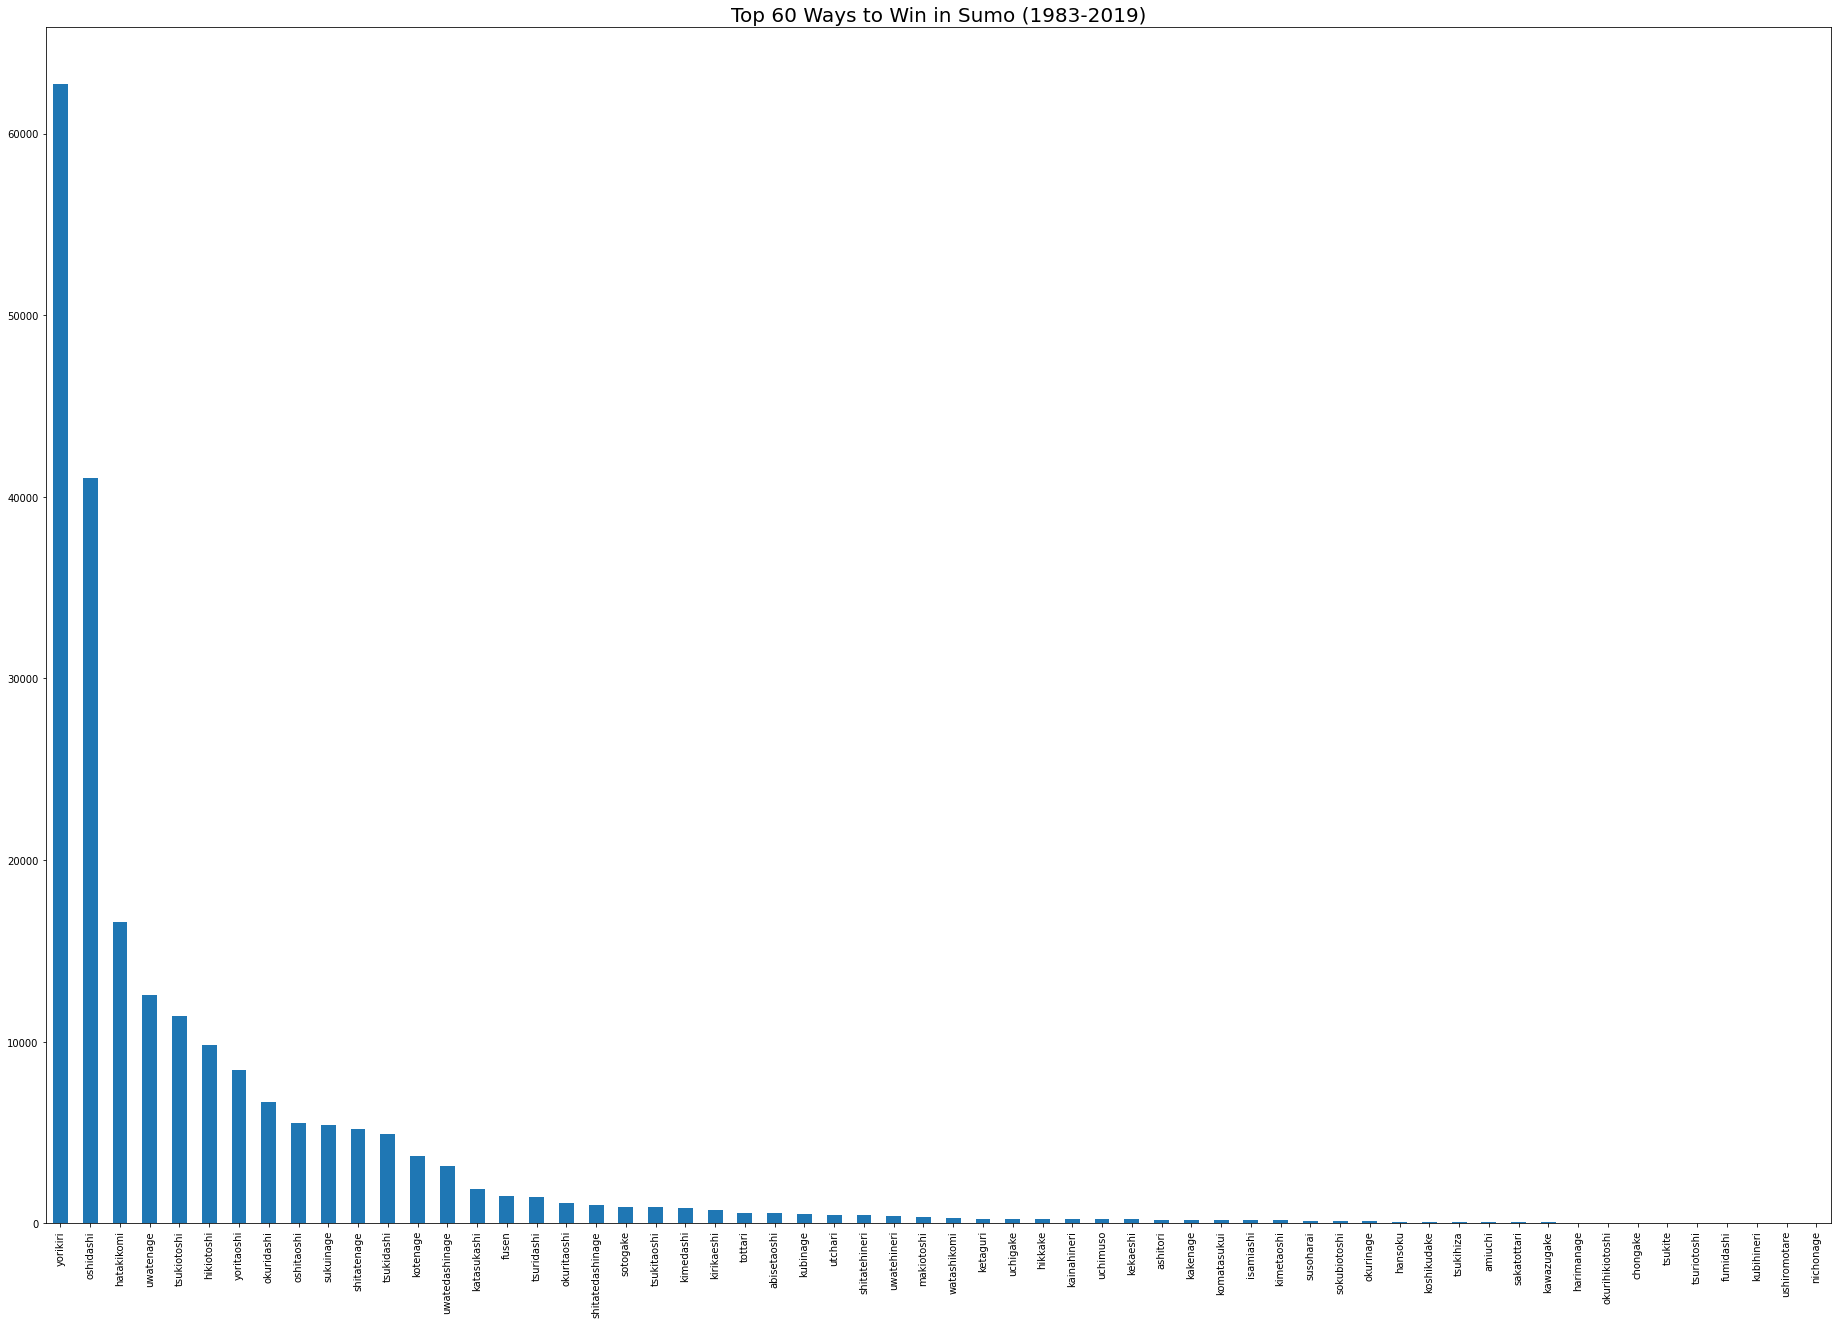

In [396]:
#explode = (0.1, 0.1, .01, .01, .01, .01, .01, .01, .01, .01) 
num_kinds = 60
font_size = round((num_kinds * .5) + 8, 0)

plt.figure(figsize=(32,22)) 
plt.title(f"Top {num_kinds} Ways to Win in Sumo (1983-2019)", size = 20)
plt.xscale("linear")

win_types.head(num_kinds).plot(kind="bar")

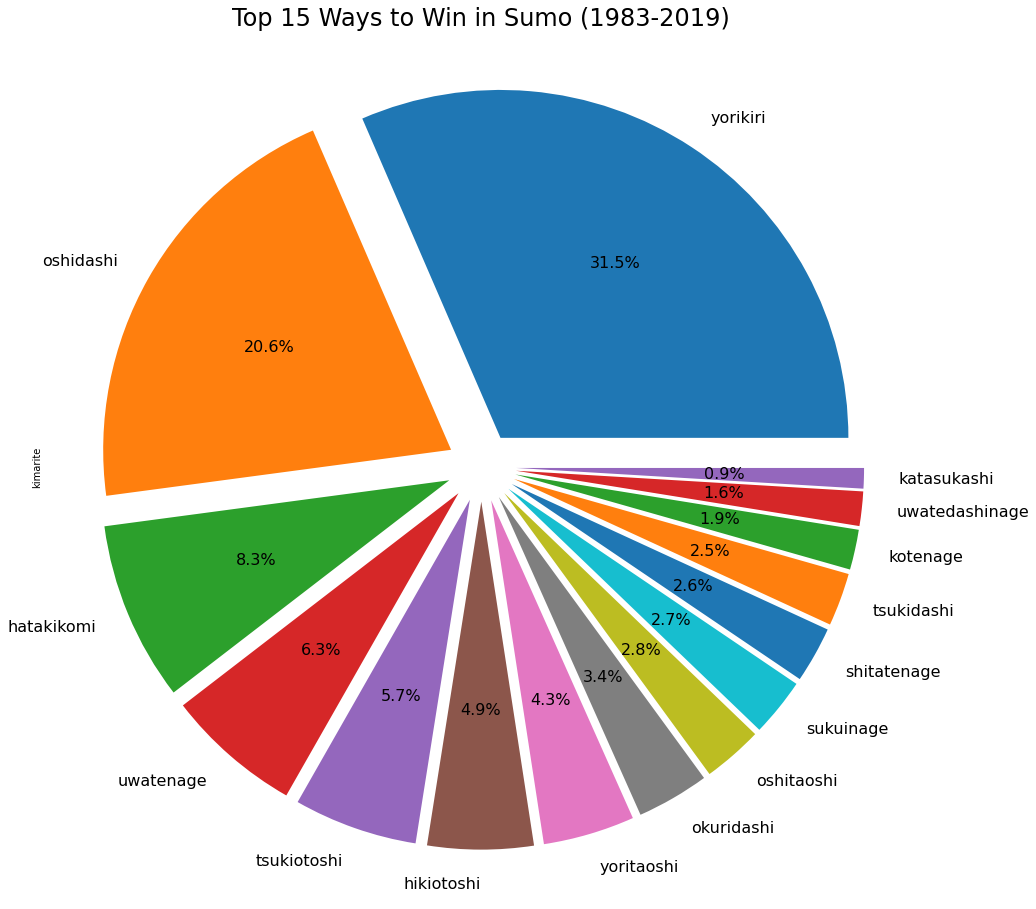

In [398]:
#As a Pie Chart Visalization
explode = []
num_kinds = 15
font_size = round((num_kinds * .5) + 8, 0)

for i in range(num_kinds):
    explode.append(.1)

plt.figure(figsize=(20,16)) 
plt.title(f"Top {num_kinds} Ways to Win in Sumo (1983-2019)", size = 24 )
win_types.head(num_kinds).plot(kind="pie", explode = explode, autopct='%1.1f%%',  textprops={'fontsize': font_size})

So, Yorikiri and Oshidashi make up a lion's share of the win_types.

# What about the rarest win types? 
What would be truly RARE to see?

In [403]:
#The tail of the win types
win_types.tail(10)

osakate             6
okuritsuriotoshi    6
mitokorozeme        4
zubuneri            4
yaguranage          4
izori               2
okurigake           2
tsumatori           2
tasukizori          2
gasshohineri        2
Name: kimarite, dtype: int64

# Let's take a look at specific wrestlers
Hakuho is the most famous. Let's take a look...

In [328]:
#Small function to return sumo information
def sumo_finder(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia
    return find_it

In [345]:
hakuho_df = sumo_finder(full_df,"rikishi1_shikona","Hakuho")

In [352]:
hakuho_df2 = sumo_finder(full_df,"rikishi2_shikona","Hakuho")

In [353]:
hakuho_df2.head(30)

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,sumo_rank,sumo_num_rank,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
66,2005.01,1,878,Y1e,Asashoryu,Yokozuna,1,1-0 (15-0),True,oshidashi,1123,K1w,Hakuho,0-1 (11-4),False
123,2005.01,2,1204,M4w,Kakizoe,Unknown,0,0-2 (8-7),False,hatakikomi,1123,K1w,Hakuho,1-1 (11-4),True
200,2005.01,3,7,O1e,Kaio,Ozeki,2,1-2 (4-6-5),False,hikiotoshi,1123,K1w,Hakuho,2-1 (11-4),True
260,2005.01,4,152,M3e,Tamanoshima,Unknown,0,0-4 (5-10),False,yorikiri,1123,K1w,Hakuho,3-1 (11-4),True
332,2005.01,5,842,S1w,Miyabiyama,Sekiwake,3,3-2 (9-6),False,hatakikomi,1123,K1w,Hakuho,4-1 (11-4),True
396,2005.01,6,876,K1e,Kotomitsuki,Komosubi,4,2-4 (7-8),False,uwatenage,1123,K1w,Hakuho,5-1 (11-4),True
468,2005.01,7,39,S1e,Wakanosato,Sekiwake,3,3-4 (6-9),True,yorikiri,1123,K1w,Hakuho,5-2 (11-4),False
534,2005.01,8,19,S2w,Tochiazuma,Sekiwake,3,6-2 (11-4),False,hikiotoshi,1123,K1w,Hakuho,6-2 (11-4),True
604,2005.01,9,8,O1w,Chiyotaikai,Ozeki,2,5-4 (8-7),False,oshidashi,1123,K1w,Hakuho,7-2 (11-4),True
666,2005.01,10,13,M2w,Tosanoumi,Unknown,0,4-6 (7-8),False,yoritaoshi,1123,K1w,Hakuho,8-2 (11-4),True


In [363]:
yokozuna_df = sumo_finder(full_df,"sumo_rank","Yokozuna")

In [380]:
yokozuna_df['kimarite'].value_counts()

yorikiri            1932
oshidashi            753
uwatenage            499
hatakikomi           273
yoritaoshi           230
tsukiotoshi          201
sukuinage            169
hikiotoshi           164
shitatenage          157
oshitaoshi           140
okuridashi           136
tsukidashi           128
uwatedashinage       113
fusen                 89
kotenage              71
tsuridashi            69
katasukashi           38
sotogake              36
tsukitaoshi           31
tottari               24
shitatedashinage      23
okuritaoshi           18
kirikaeshi            17
kubinage              16
abisetaoshi           16
uwatehineri           15
shitatehineri         14
kimedashi             10
utchari                9
hikkake                7
watashikomi            7
makiotoshi             6
kakenage               6
okurinage              6
susoharai              6
uchimuso               6
komatasukui            5
koshikudake            5
amiuchi                5
tsuriotoshi            5


In [381]:
#Number of Unique Kinds of Wins for Yokozuna
len(yokozuna_df['kimarite'].value_counts())

60

In [329]:
sumo_finder(full_df, "kimarite", "zubuneri")

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,sumo_rank,sumo_num_rank,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
1284,1998.03,5,21,M11e,Asahiyutaka,Unknown,0,3-2 (8-7),True,zubuneri,33,M8e,Terao,2-3 (5-10),False
1285,1998.03,5,33,M8e,Terao,Unknown,0,2-3 (5-10),False,zubuneri,21,M11e,Asahiyutaka,3-2 (8-7),True
906,1996.01,15,35,J9w,Kyokushuzan,Juryo,6,8-7,True,zubuneri,1298,Ms5w,Kotoarashi,4-3,False
907,1996.01,15,1298,Ms5w,Kotoarashi,Maegashira,5,4-3,False,zubuneri,35,J9w,Kyokushuzan,8-7,True


In [330]:
full_df.head(50)

,basho,day,rikishi1_id,rikishi1_rank,rikishi1_shikona,sumo_rank,sumo_num_rank,rikishi1_result,rikishi1_win,kimarite,rikishi2_id,rikishi2_rank,rikishi2_shikona,rikishi2_result,rikishi2_win
0,1988.01,1,51,Ms1e,Daizen,Maegashira,5,0-1 (6-1),False,yorikiri,1331,J13w,Saganobori,1-0 (8-7),True
1,1988.01,1,1331,J13w,Saganobori,Juryo,6,1-0 (8-7),True,yorikiri,51,Ms1e,Daizen,0-1 (6-1),False
2,1988.01,1,1433,J12w,Kitafubuki,Juryo,6,1-0 (5-10),True,yorikiri,1496,J13e,Seionada,0-1 (0-15),False
3,1988.01,1,1496,J13e,Seionada,Juryo,6,0-1 (0-15),False,yorikiri,1433,J12w,Kitafubuki,1-0 (5-10),True
4,1988.01,1,1377,J12e,Iwatefuji,Juryo,6,0-1 (4-11),False,tsukidashi,4138,J11w,Tochimatoi,1-0 (8-7),True
5,1988.01,1,4138,J11w,Tochimatoi,Juryo,6,1-0 (8-7),True,tsukidashi,1377,J12e,Iwatefuji,0-1 (4-11),False
6,1988.01,1,1296,J11e,Kasugafuji,Juryo,6,0-1 (8-7),False,tsukiotoshi,4140,J10w,Chikubayama,1-0 (7-8),True
7,1988.01,1,4140,J10w,Chikubayama,Juryo,6,1-0 (7-8),True,tsukiotoshi,1296,J11e,Kasugafuji,0-1 (8-7),False
8,1988.01,1,1365,J10e,Hananofuji,Juryo,6,0-1 (7-8),False,shitatenage,4094,J9w,Onishiki,1-0 (5-10),True
9,1988.01,1,4094,J9w,Onishiki,Juryo,6,1-0 (5-10),True,shitatenage,1365,J10e,Hananofuji,0-1 (7-8),False


In [331]:
#Small function to return sumo information
def sumo_finder(dataframe, column, name, exact=True):
    if exact == True:
        find_it = dataframe[dataframe[column].str.match(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia

    else:
        find_it = dataframe[dataframe[column].str.contains(name, case=False)] #Rewrote with match instead of contains to prevent west virginia/virginia
    return find_it

In [332]:
rikishi_rank_types = full_df['rikishi1_rank']

In [333]:
len(rikishi_rank_types)

214788

In [334]:
rikishi_rank_types.value_counts

<bound method IndexOpsMixin.value_counts of 0       Ms1e
1       J13w
2       J12w
3       J13e
4       J12e
        ... 
5857     S1w
5858     Y1w
5859     O1w
5860     O1w
5861     O2e
Name: rikishi1_rank, Length: 214788, dtype: object>

https://www.npmjs.com/package/sumo-rank?activeTab=readme

In [335]:
for rank in sumo_rank_full:
    print(len(rank))

6


In [356]:
rikishi_byrank = full_df.groupby(['rikishi1_rank']).mean()

In [357]:
rikishi_byrank = rikishi_byrank.sort_values(by="sumo_num_rank", ascending=False)
rikishi_byrank.head(10)

,basho,day,rikishi1_id,sumo_num_rank,rikishi1_win,rikishi2_id,rikishi2_win
rikishi1_rank,,,,,,,
J10e,2000.768245,7.979874,2683.522013,6.0,0.481761,2661.156289,0.518239
J3e,2000.768131,8.000941,2630.568517,6.0,0.524929,2495.738162,0.475071
J9w,2000.769255,7.975493,2834.645767,6.0,0.503819,2597.927435,0.496181
J9e,2001.007174,7.975316,2585.142857,6.0,0.496452,2664.706881,0.503548
J8w,2001.125453,7.962005,2665.650383,6.0,0.503831,2634.005109,0.496169
J7w,2000.877520,7.956065,2608.489971,6.0,0.483604,2553.040433,0.516396
J7e,2000.910586,7.969130,2512.518241,6.0,0.481447,2724.992828,0.518553
J6w,2000.913724,8.019188,2432.951557,6.0,0.489462,2653.239069,0.510538
J6e,2000.829981,7.994364,2490.127426,6.0,0.528178,2622.314966,0.471822


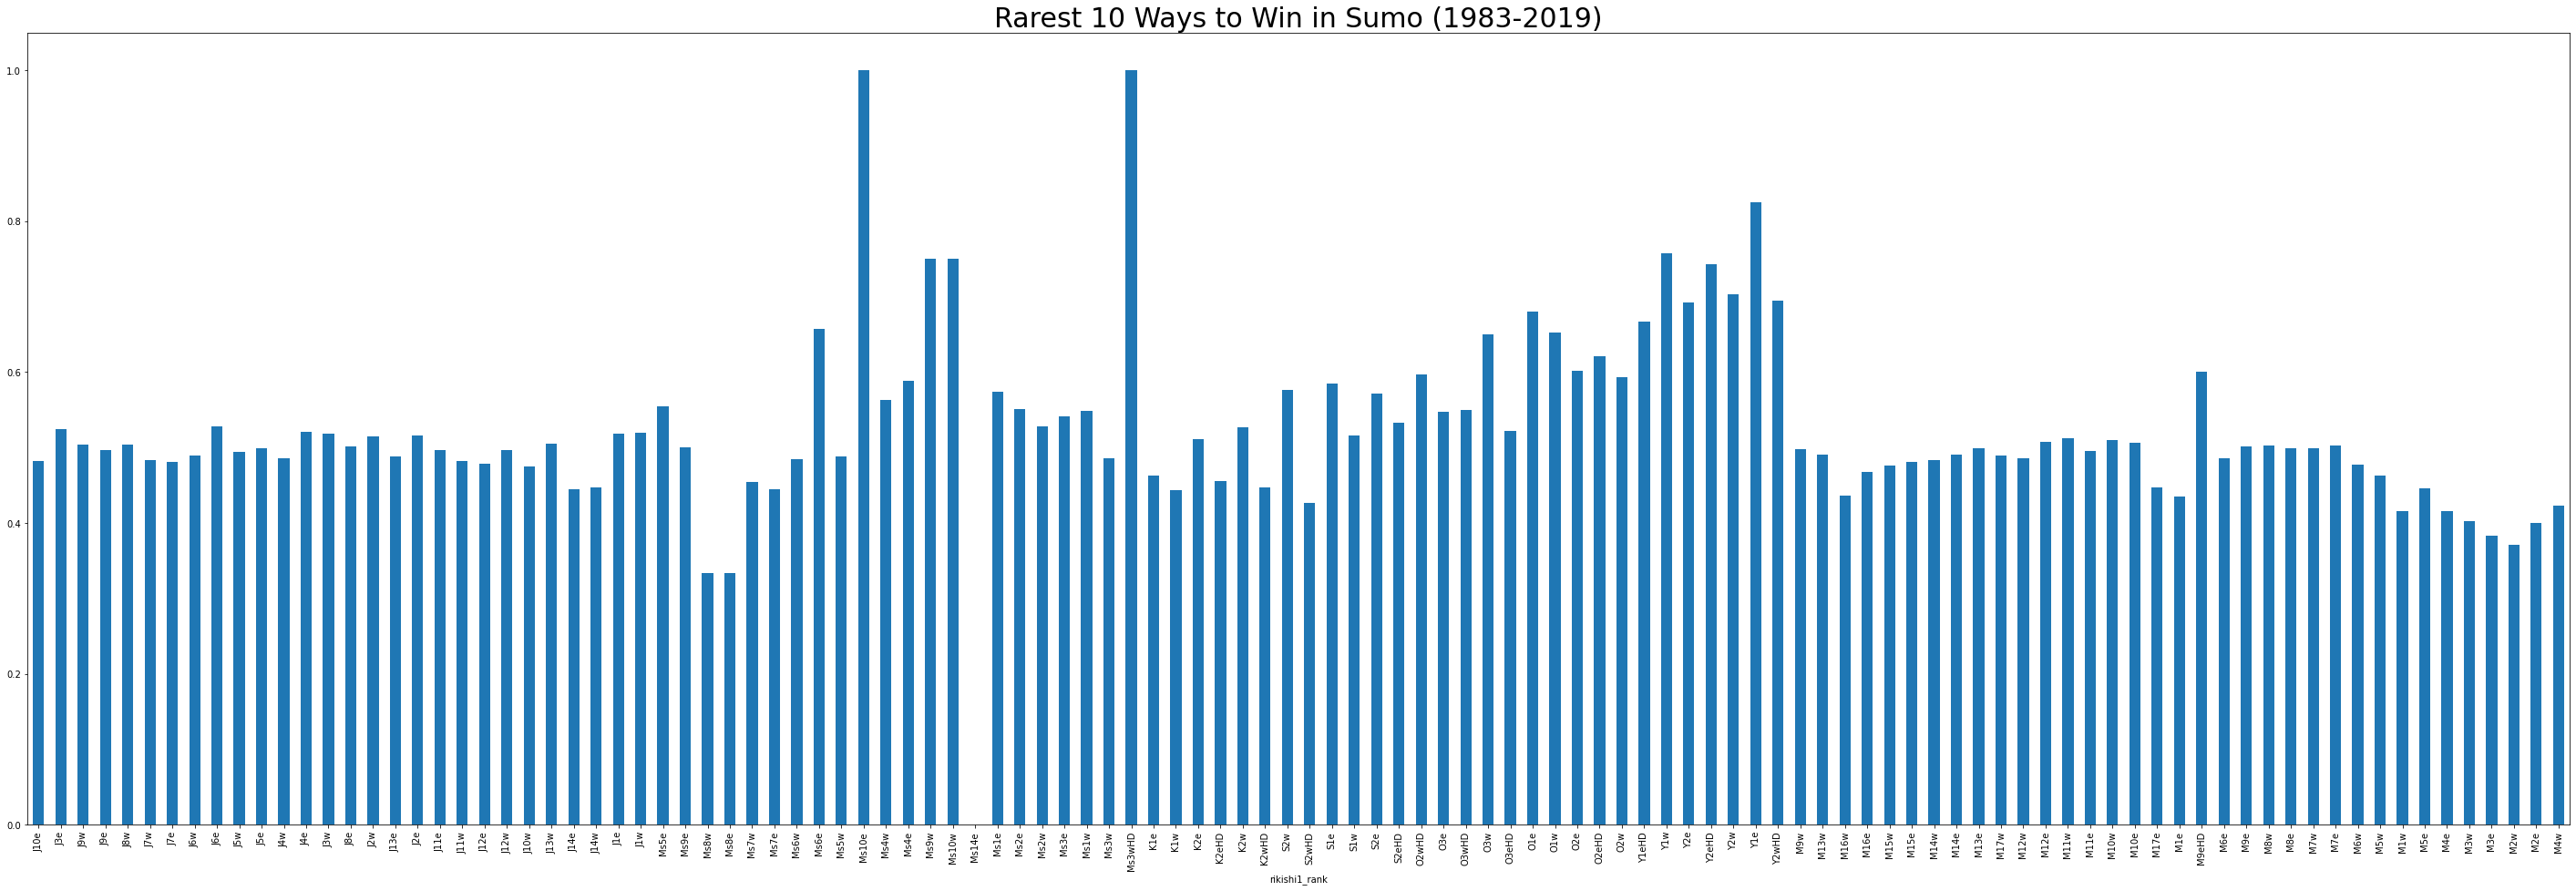

In [358]:
plt.figure(figsize=(50,16)) 
plt.title("Rarest 10 Ways to Win in Sumo (1983-2019)", size = 30)
rikishi_byrank["rikishi1_win"].plot(kind="bar")

In [339]:
rikishi_byname = full_df.groupby(['rikishi1_shikona']).mean()
rikishi_byname = rikishi_byname.sort_values(by="rikishi1_win", ascending=False)
rikishi_byname.head(10)

,basho,day,rikishi1_id,sumo_num_rank,rikishi1_win,rikishi2_id,rikishi2_win
rikishi1_shikona,,,,,,,
Shidenryu,1988.11,11.0,1290.0,5.0,1.0,1381.0,0.0
Masunosho,2017.09,5.0,11855.0,5.0,1.0,6559.0,0.0
Saito,1998.11,14.0,129.0,5.0,1.0,61.0,0.0
Wakaadachi,1992.09,13.0,34.0,5.0,1.0,76.0,0.0
Uchida,2003.03,10.0,2834.0,5.0,1.0,149.0,0.0
Horyuyama,2014.06,10.5,11764.0,5.0,1.0,5993.0,0.0
Takanonada,1995.07,14.0,1336.0,5.0,1.0,57.0,0.0
Kototamiya,1999.09,9.0,876.0,5.0,1.0,66.0,0.0
Kurimoto,1994.05,15.0,177.0,5.0,1.0,174.0,0.0


In [340]:
#Save Df
full_df.to_csv("full_df.csv", index=True)